## Ch 11 - Lossy Compression with Side Information

Reference: Ch 11 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

### Thm 11.1 (Lossy, Causal Side Information)

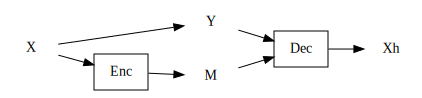

In [2]:
M, X, Y = rv("M, X, Y")
Xh = rv("Xh", latex="\hat{X}")
R = real("R")

# Lossy compression with side info available causally at decoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_edge(X, Y)                  # Correlated source X, Y
model.add_node(X, M, label = "Enc")   # Encoder maps X to M
model.add_node(M+Y, Xh,
   rv_in_causal = Y, label = "Dec")   # Decoder maps M,Y to Xh

model.graph()                         # Draw diagram

In [3]:
R_opt = model.minimum(R, R) # Get optimal rate, recovers [Weissman-El Gamal 2006]
R_opt.upper_bound()

(( ( markov(A_M, X, Y) )
 &( markov(X, A_M+Y, Xh) ) ).exists(A_M)).minimum(I(A_M&X))

In [4]:
r = model.get_inner(is_proof=True) # Achievability proof
r.display(note=True)

<IPython.core.display.Math object>

In [5]:
# Converse proof
model.proof_outer(r)

In [6]:
(R_opt >= I(X & Xh | Y)).solve()  # A lower bound on R_opt

True

In [7]:
# The program makes an implicit assumption that the empirical joint distribution
# of (X,Y,Z) is fixed, so we are not free to choose Z conditionally
# independent of Y given X. Hence, the following test on upper bound fails:
# bool(R_opt <= I(X & Xh))
# To show the upper bound, we need an additional assumption:

(markov(Y, X, Xh) >> (R_opt <= I(X & Xh))).solve() # Upper bound

True
CompArray(
[[A_M, Xh]])

### Thm 11.2 (Lossless, Causal Side Information)

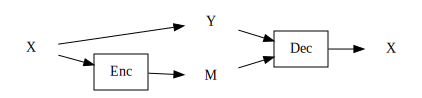

In [8]:
M, X, Y = rv("M, X, Y")
R = real("R")

# Lossless compression with side info available causally at decoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_edge(X, Y)                  # Correlated source X, Y
model.add_node(X, M, label = "Enc")   # Encoder maps X to M
model.add_node(M+Y, X,
   rv_in_causal = Y, label = "Dec")   # Decoder maps M,Y to X

model.graph()                         # Draw diagram

In [9]:
R_opt = model.minimum(R, R) # Get optimal rate, recovers [Weissman-El Gamal 2006]
R_opt.upper_bound()

(( ( H(X|A_M+Y) == 0 )
 &( markov(A_M, X, Y) ) ).exists(A_M)).minimum(I(A_M&X))

In [10]:
r = model.get_inner(is_proof=True) # Achievability proof
r.display(note=True)

<IPython.core.display.Math object>

In [11]:
# Converse proof
model.proof_outer(r)

### Thm 11.3 (Lossy, Noncausal Side Information / Wyner-Ziv Thm)

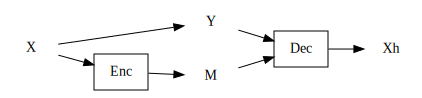

In [12]:
M, X, Y = rv("M, X, Y")
Xh = rv("Xh", latex="\hat{X}")
R = real("R")

# Lossy compression with side info available noncausally at decoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_edge(X, Y)                  # Correlated source X, Y
model.add_node(X, M, label = "Enc")   # Encoder maps X to M
model.add_node(M+Y, Xh, label = "Dec") # Decoder maps M,Y to Xh

model.graph()                         # Draw diagram

In [13]:
R_opt = model.minimum(R, R) # Get optimal rate, recovers [Wyner-Ziv 1976]
R_opt.upper_bound()

(( ( markov(A_M, X, Y) )
 &( markov(X, A_M+Y, Xh) ) ).exists(A_M)).minimum(I(A_M&X|Y))

In [14]:
r = model.get_inner(is_proof=True) # Achievability proof
r.display(note=True)

<IPython.core.display.Math object>

In [15]:
# Converse proof
model.proof_outer(r)

In [16]:
(R_opt >= I(X & Xh | Y)).solve()  # A lower bound on R_opt

True

In [17]:
(markov(Y, X, Xh) >> (R_opt <= I(X & Xh))).solve() # Upper bound

True
CompArray(
[[A_M, Xh]])

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 11.
-  A. D. Wyner and J. Ziv, "The rate-distortion function for source coding with side information at the decoder," IEEE Transactions on Information Theory, vol. 22, no. 1, pp. 1–10, January 1976.
-   T. Weissman and A. El Gamal, "Source coding with limited-look-ahead side information at the decoder," IEEE Trans. Inf. Theory, vol. 52, no. 12, pp. 5218–5239, Dec. 2006.
